In [1]:
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import ROOT
from ROOT import gSystem, gInterpreter
import approximator.particles_trajectory_generator as ptg
import approximator.runner as ap_runnner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
import approximator.optics_parameters as op
import models.train_model as tram
import data.bunch_configuration as buc
import madx.madx_configuration as mc

sns.set_style("whitegrid")

sys.path.append("/home/rafalmucha/Pobrane/optic/optics_generator_python/src")
path_to_configuration = "/home/rafalmucha/Pobrane/optic/2016/"
path_to_xml_file = "/home/rafalmucha/Pobrane/optic/2016/configuration_reconst_beam1.xml"
item_number = 0
madx_configuration = mc.MadxConfiguration(path_to_xml_file, item_number, path_to_configuration)

Welcome to JupyROOT 6.16/00


In [2]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 10000

In [3]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

In [4]:
home = "/home/rafalmucha/Pobrane/optic/optics_generator_python/"

In [5]:
import models.approximator as ma
approximators = tram.train(bunch_configuration, madx_configuration, home)
approximator = ma.Approximator(approximators)

Name: multidimfit Title: Multi-dimensional fit object
Name: multidimfit Title: Multi-dimensional fit object
Name: multidimfit Title: Multi-dimensional fit object
Name: multidimfit Title: Multi-dimensional fit object


Error in <TCling::RegisterModule>: cannot find dictionary module FitCint_rdict.pcm


In [6]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0.0
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0
pt_mean = -0.075
sigma_pt = 0.075

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 1000

In [7]:
subtitle = "dupa"
plot_size = 5
grid_x_resolution = 5
grid_y_resolution = 7

In [8]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

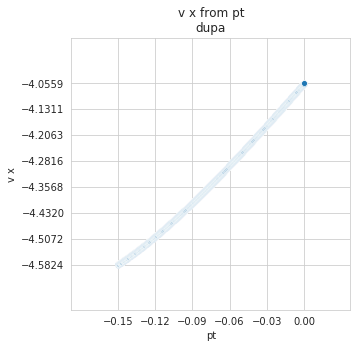

In [9]:
opv.plot_optical_function_of_approximator(approximator, bunch_configuration, op.compute_v_x, "pt", "v x", subtitle)

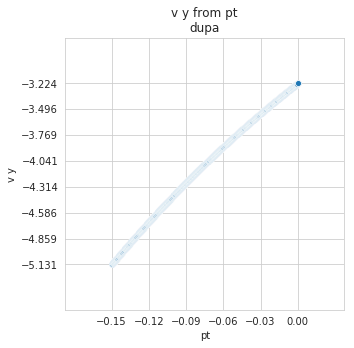

In [10]:
opv.plot_optical_function_of_approximator(approximator, bunch_configuration, op.compute_v_y, "pt", "v y", subtitle)

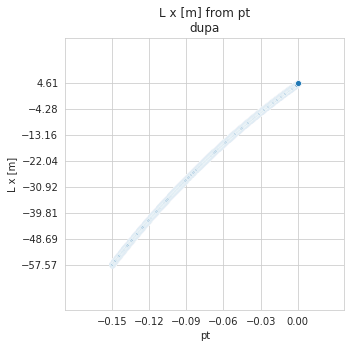

In [11]:
opv.plot_optical_function_of_approximator(approximator, bunch_configuration, op.compute_l_x, "pt", "L x", subtitle, y_unit=" [m]")

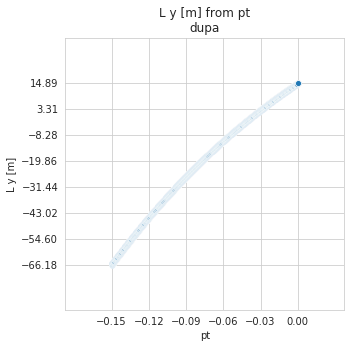

In [12]:
opv.plot_optical_function_of_approximator(approximator, bunch_configuration, op.compute_l_y, "pt", "L y", subtitle, y_unit=" [m]")

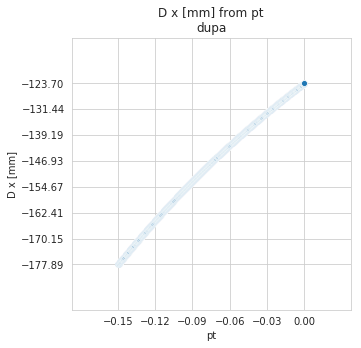

In [13]:
opv.plot_optical_function_of_approximator(approximator, bunch_configuration, op.compute_d_x, "pt", "D x", subtitle, y_unit=" [mm]", y_unit_multiplier=1000)

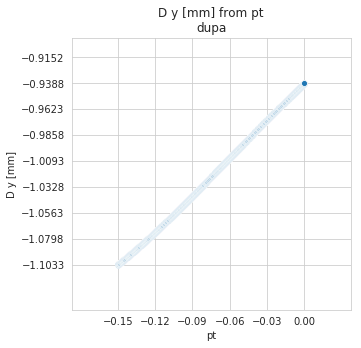

In [14]:
opv.plot_optical_function_of_approximator(approximator, bunch_configuration, op.compute_d_y, "pt", "D y", subtitle, y_unit=" [mm]", y_unit_multiplier=1000)

In [15]:
output = ptg.generate_random_particles(approximator, bunch_configuration)

In [16]:
# Names of segments, like MQXA.3R5
start_segment_name = "start"
end_segment_name = "end"

if start_segment_name != "start":
    output[start_segment_name].T[1] -= 1

In [17]:
output_matrix = output[end_segment_name]
input_matrix = output[start_segment_name]

In [18]:
index_map = {
    "x": 0,
    "theta x": 1,
    "y": 2,
    "theta y": 3,
    "t": 4,
    "pt": 5
}
meters = " [m]"
radians = " [rad]"
seconds = " [s]"
energy = " [TeV]"
no_unit = " "
unit_map = {
    "x": meters,
    "theta x": radians,
    "y": meters,
    "theta y": radians,
    "t": seconds,
    "pt": no_unit,
    "s": meters,
    "e": energy
}


def plot_histogram(x_name, y_name, x_name_prefix, y_name_prefix, x_matrix, y_matrix, plot_axes, plot_x_pos, plot_y_pos):
    
    title = "Histogram " + x_name_prefix + x_name + " and " + y_name_prefix + y_name + " parameter"
    
    # Get vectors and their properties
    
    x_index = index_map[x_name]
    y_index = index_map[y_name]
    
    vector_x = pd.Series(x_matrix.T[x_index], name=x_name_prefix + x_name)
    vector_y = pd.Series(y_matrix.T[y_index], name=y_name_prefix + y_name)
    
    print(np.min(vector_x), np.max(vector_x))
    
    bins_number = 50
    
    sns.distplot(vector_x, bins=bins_number, ax=axes[plot_x_pos][plot_y_pos], color='y').set_title(title)
    sns.distplot(vector_y, bins=bins_number, ax=axes[plot_x_pos][plot_y_pos], color='b').set_title(title)

1e-07 1e-07
1e-07 1e-07
1e-07 1e-07
1e-07 1e-07


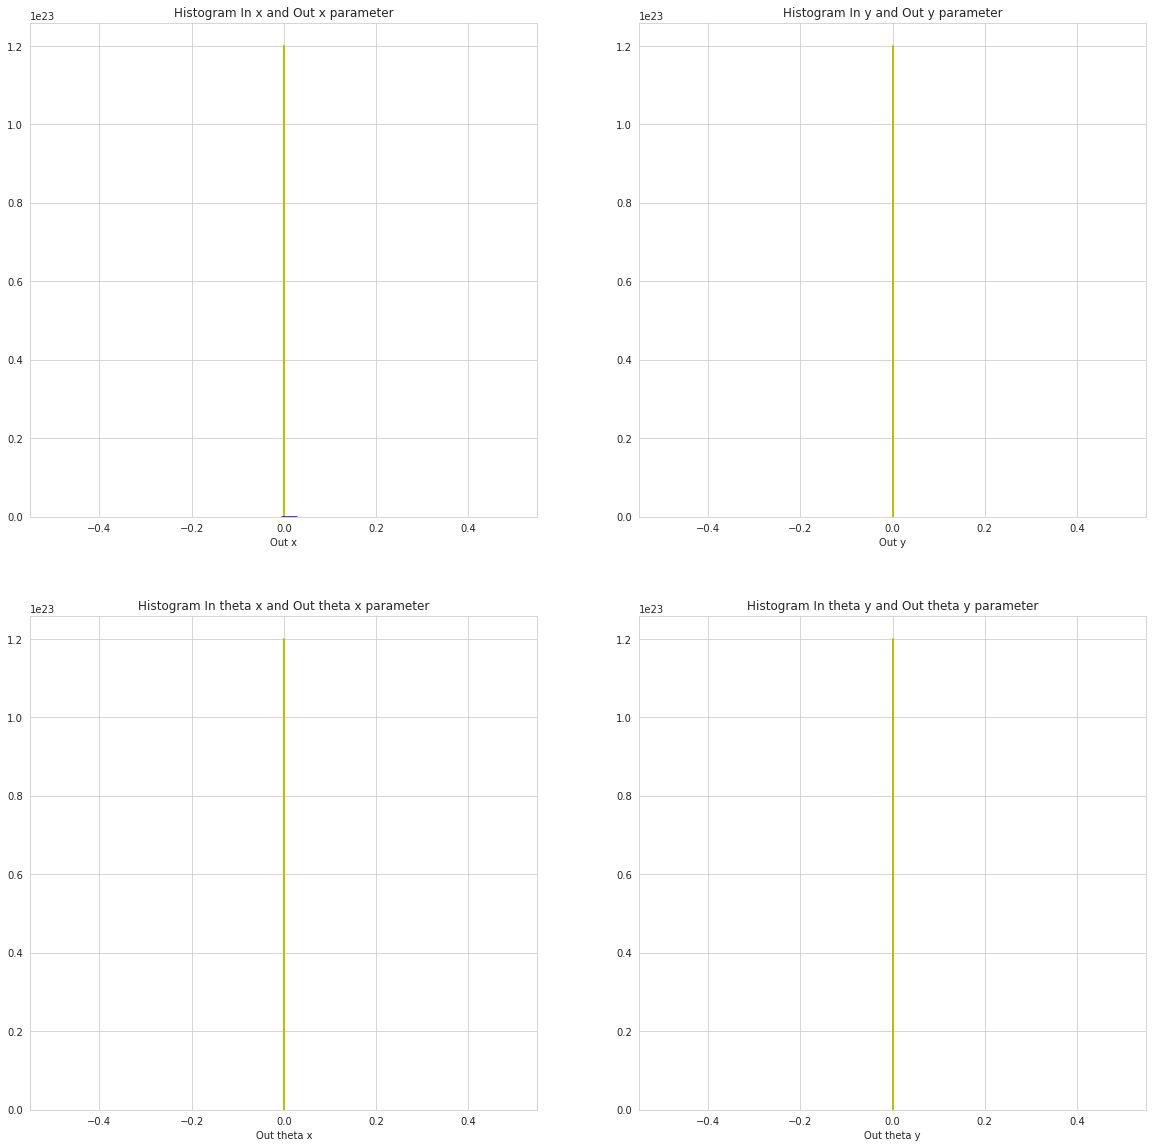

In [19]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

plot_histogram("x", "x", "In ", "Out ", input_matrix, output_matrix, axes, 0, 0)

plot_histogram("y", "y", "In ", "Out ", input_matrix, output_matrix, axes, 0, 1)

plot_histogram("theta x", "theta x", "In ", "Out ", input_matrix, output_matrix, axes, 1, 0)

plot_histogram("theta y", "theta y", "In ", "Out ", input_matrix, output_matrix, axes, 1, 1)
